<a href="https://colab.research.google.com/github/AdamQinwt/Colab_Code/blob/master/CIFAR100_try1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt

(50000, 32, 32, 3)


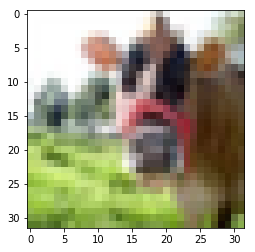

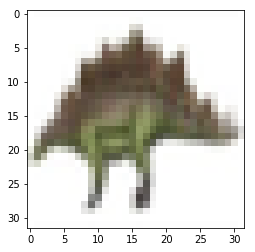

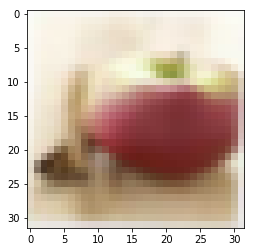

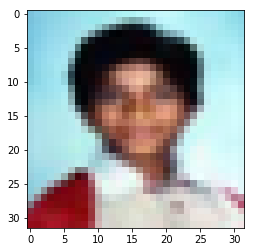

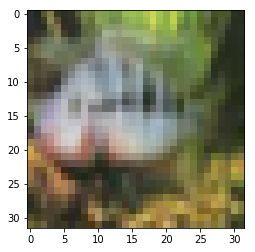

In [0]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar100.load_data()

# add empty color dimension
#x_train = np.expand_dims(x_train, -1)
#x_test = np.expand_dims(x_test, -1)
print(x_train.shape)
for i in range(5):
  plt.imshow(x_train[i,:,:,:])
  plt.show()
#

def create_model():
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.BatchNormalization(input_shape=x_train.shape[1:]))
  model.add(tf.keras.layers.Conv2D(64, (5, 5), padding='same', activation='elu'))
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
  model.add(tf.keras.layers.Dropout(0.25))

  model.add(tf.keras.layers.BatchNormalization(input_shape=x_train.shape[1:]))
  model.add(tf.keras.layers.Conv2D(128, (5, 5), padding='same', activation='elu'))
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
  model.add(tf.keras.layers.Dropout(0.25))

  model.add(tf.keras.layers.BatchNormalization(input_shape=x_train.shape[1:]))
  model.add(tf.keras.layers.Conv2D(256, (5, 5), padding='same', activation='elu'))
  model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)))
  model.add(tf.keras.layers.Dropout(0.25))

  model.add(tf.keras.layers.Flatten())
  model.add(tf.keras.layers.Dense(256))
  model.add(tf.keras.layers.Activation('elu'))
  model.add(tf.keras.layers.Dropout(0.5))
  model.add(tf.keras.layers.Dense(100))
  model.add(tf.keras.layers.Activation('softmax'))
  return model

In [0]:
import os

resolver = tf.contrib.cluster_resolver.TPUClusterResolver('grpc://' + os.environ['COLAB_TPU_ADDR'])
tf.contrib.distribute.initialize_tpu_system(resolver)
strategy = tf.contrib.distribute.TPUStrategy(resolver)

with strategy.scope():
  model = create_model()
  model.compile(
      optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3, ),
      loss='sparse_categorical_crossentropy',
      metrics=['sparse_categorical_accuracy'])

model.fit(
    x_train.astype(np.float32), y_train.astype(np.float32),
    epochs=17,
    steps_per_epoch=125,
    validation_data=(x_test.astype(np.float32), y_test.astype(np.float32)),
    validation_freq=17
)

model.save_weights('./cifar100.h5', overwrite=True)

W0904 05:09:31.119040 140416730822528 tpu_strategy_util.py:56] TPU system %s has already been initialized. Reinitializing the TPU can cause previously created variables on TPU to be lost.
W0904 05:10:07.483791 140416730822528 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training_distributed.py:411: Variable.load (from tensorflow.python.ops.variables) is deprecated and will be removed in a future version.
Instructions for updating:
Prefer Variable.assign which has equivalent behavior in 2.X.


Epoch 1/17
125/125 [==============================] - 5s 39ms/step - loss: 4.8109 - sparse_categorical_accuracy: 0.0472
Epoch 2/17
125/125 [==============================] - 2s 19ms/step - loss: 4.0563 - sparse_categorical_accuracy: 0.1165
Epoch 3/17
125/125 [==============================] - 2s 19ms/step - loss: 3.4496 - sparse_categorical_accuracy: 0.1947
Epoch 4/17
125/125 [==============================] - 2s 19ms/step - loss: 3.0241 - sparse_categorical_accuracy: 0.2653
Epoch 5/17
125/125 [==============================] - 2s 19ms/step - loss: 2.7264 - sparse_categorical_accuracy: 0.3209
Epoch 6/17
125/125 [==============================] - 2s 20ms/step - loss: 2.5099 - sparse_categorical_accuracy: 0.3621
Epoch 7/17
125/125 [==============================] - 2s 20ms/step - loss: 2.3191 - sparse_categorical_accuracy: 0.3984
Epoch 8/17
125/125 [==============================] - 2s 19ms/step - loss: 2.2004 - sparse_categorical_accuracy: 0.4188
Epoch 9/17
125/125 [====================